# TCLab Lab 1: Coding a relay controller

From https://github.com/jckantor/CBE30338

and this one more specifically: https://github.com/jckantor/cbe30338-book/blob/main/notebooks/03.04-Relay-Control.ipynb

The purpose of this first laboratory session is to verify that you can interface and interact with the TCLab hardware, and familiarize you with the TCLab library. The first exercise will be to code a rudimentary relay (also called 'on-off' or thermostat) controller for one of the two heaters.

Before you begin, you should be familiar with the following reading meterials:

* [On-Off Control in Section 1.6 of *Feedback Control for Scientists and Engineers*](http://www.cds.caltech.edu/~murray/books/AM08/pdf/fbs-intro_07Aug2019.pdf#page=19)
* [01_Understanding_TCLab](./01_Understanding_TCLab.ipynb)



## Exercise 1. Download and install TCLab.py

Execute the following cell to download and install the TCLab.py python library.

In [ ]:
!pip install tclab --upgrade

## Exercise 2.  Verify that your hardware and software are working correctly.

The following cell should cause the LED on the TCLab shield to light up to 100% maximum brightness.

In [ ]:
from tclab import TCLab

with TCLab() as lab:
    lab.LED(0)

TCLab version 1.0.0
Arduino Leonardo connected on port /dev/cu.usbmodem142101 at 115200 baud.
TCLab Firmware 3.0.0 Arduino Leonardo/Micro.
TCLab disconnected successfully.


## Exercise 3. Turn on the heaters for 120 seconds and log temperature response.

For this exercise, write a code cell that turns on heater 1 at 100% power, then log the temperature response once per second for 120 seconds. The output of the cell should report the time, power level, and temperature for each measurement. You may wish to consult [01_Understanding_TCLab](./01_Understanding_TCLab.ipynb) notebook for relevant code examples. You will need the `clock` function from `tclab` for this exercise.

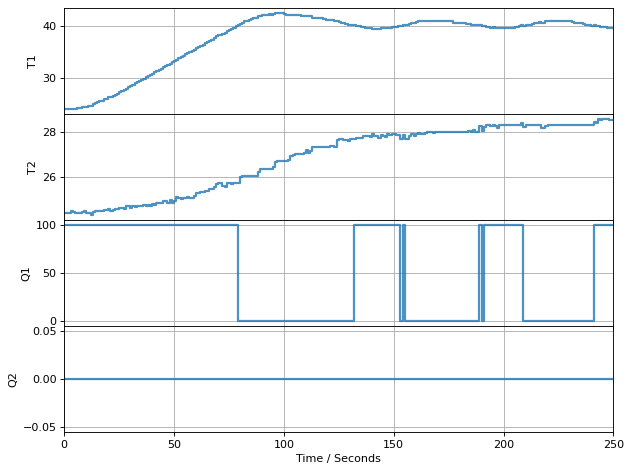

TCLab disconnected successfully.


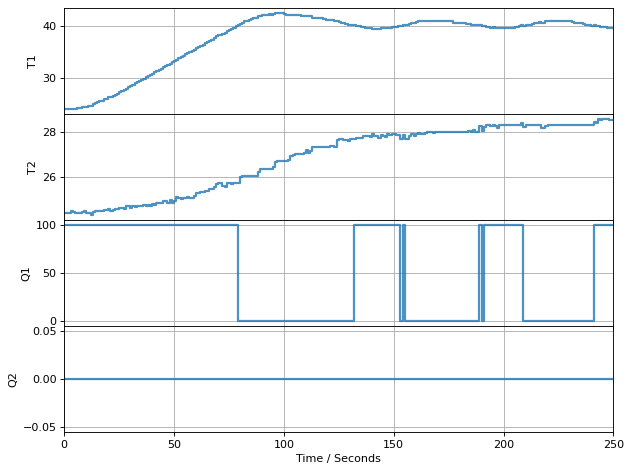

In [ ]:
from tclab import TCLab, clock, Historian, Plotter, setup
# TCLab = setup(connected=False, speedup=20)

# control parameters
U_min = 0
U_max = 100
T_SP = 40

# time horizon and time step
t_final = 250
t_step = 1

# perform experiment
with TCLab() as lab:
    lab.P1 = 200
    h = Historian(lab.sources)
    p = Plotter(h, t_final)
    for t in clock(t_final, t_step):
        T1 = lab.T1                             # measure temperature
        if lab.T1 < T_SP:
            U1 = U_max
        else
            U1 = U_min
#         U1 = U_max if lab.T1 < T_SP else U_min  # compute manipulated variable
        lab.Q1(U1)                              # adjust power
        p.update(t)                             # log results

## Exercise 4. Code an on-off controller. 

Code an on-off controller for a setpoint of 40 degrees C using heater 1 as the manipulated variable, and temperature 1 as the measured variable. Operate the controller for at least 5 minutes (600 seconds), reporting time/power/temperature measurements every 2 seconds. 

In [ ]:
from tclab import TCLab, clock, Historian, Plotter, setup

TCLab = setup(connected=False, speedup=20)

# control parameters
U_min = 0
U_max = 100
T_SP = 40

# time horizon and time step
t_final = 250
t_step = 1

# perform experiment
with TCLab() as lab:
    lab.P1 = 200
    h = Historian(lab.sources)
    p = Plotter(h, t_final)
    for t in clock(t_final, t_step):
        T1 = lab.T1                             # measure temperature
        U1 = U_max if lab.T1 < T_SP else U_min  # compute manipulated variable
        lab.Q1(U1)                              # adjust power
        p.update(t)                             # log results

## Exercise 5. Analysis

Examine the results of the previous exercise and answer the following questions.

1. Approximately how much time elapses between power on and power off events?

2. What is the approximate duty cycle (i.e, fraction of time the heater is in the 'on' state) once the initial start-up period has passed.

3. What is the size of the oscillation around the setpoint?  Why does this occur?